In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [213]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


x (independent variables) = 'housing_median_age', 'total_rooms', 'total_bedrooms'

y (dependent variable) = 'median_house_value'

In [214]:
x=df[['housing_median_age','total_rooms','total_bedrooms']]
y=df['median_house_value']

In [215]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  17000 non-null  float64
 1   total_rooms         17000 non-null  float64
 2   total_bedrooms      17000 non-null  float64
dtypes: float64(3)
memory usage: 398.6 KB


In [216]:
x.describe()

,housing_median_age,total_rooms,total_bedrooms
count,17000.000000,17000.000000,17000.000000
mean,28.589353,2643.664412,539.410824
std,12.586937,2179.947071,421.499452
min,1.000000,2.000000,1.000000
25%,18.000000,1462.000000,297.000000
50%,29.000000,2127.000000,434.000000
75%,37.000000,3151.250000,648.250000
max,52.000000,37937.000000,6445.000000


In [217]:
y.dtype

dtype('float64')

In [234]:
y.describe()

,median_house_value
count,17000.000000
mean,207300.912353
std,115983.764387
min,14999.000000
25%,119400.000000
50%,180400.000000
75%,265000.000000
max,500001.000000


In [218]:
x.isnull().sum()

,0
housing_median_age,0
total_rooms,0
total_bedrooms,0


<Axes: >

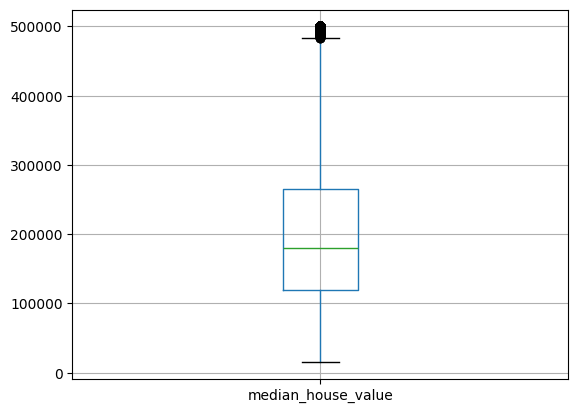

In [219]:
df.boxplot(column='median_house_value')

In [132]:
dy=df.drop(df[df['median_house_value']>483300].index)

array([[<Axes: title={'center': 'total_bedrooms'}>]], dtype=object)

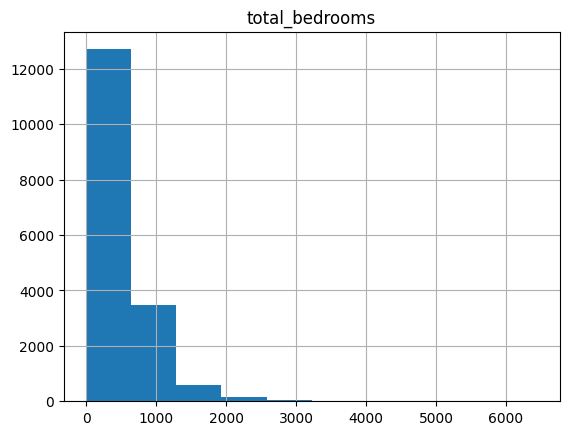

In [220]:
df.hist(column='total_bedrooms')

array([[<Axes: title={'center': 'total_rooms'}>]], dtype=object)

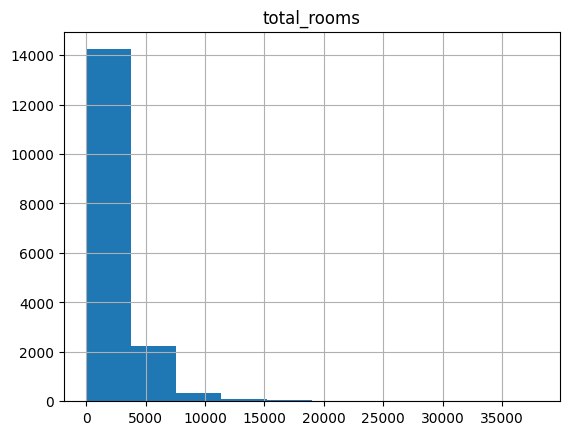

In [221]:
df.hist(column='total_rooms')

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

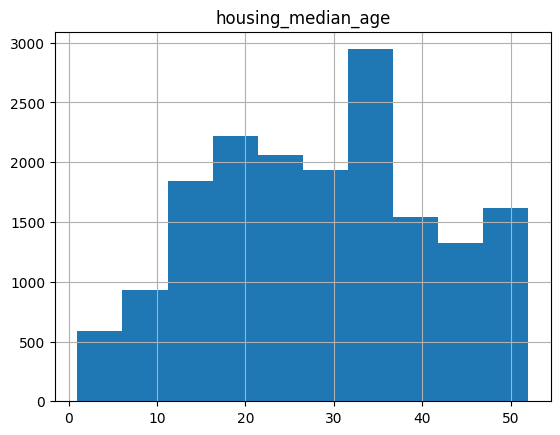

In [222]:
df.hist(column='housing_median_age')

array([[<Axes: title={'center': 'median_house_value'}>]], dtype=object)

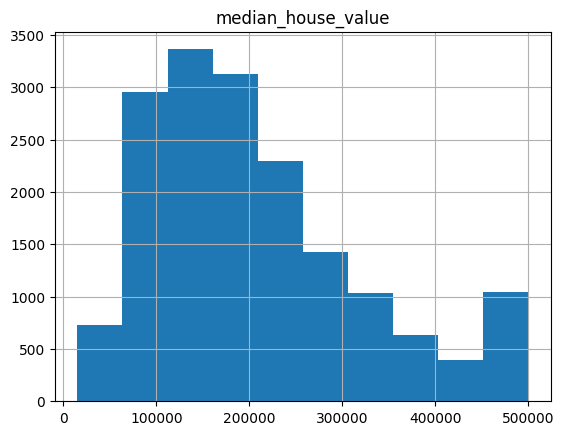

In [223]:
df.hist(column='median_house_value')

<ipython-input-231-800f81768660>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bedrooms'])


<Axes: xlabel='total_bedrooms', ylabel='Density'>

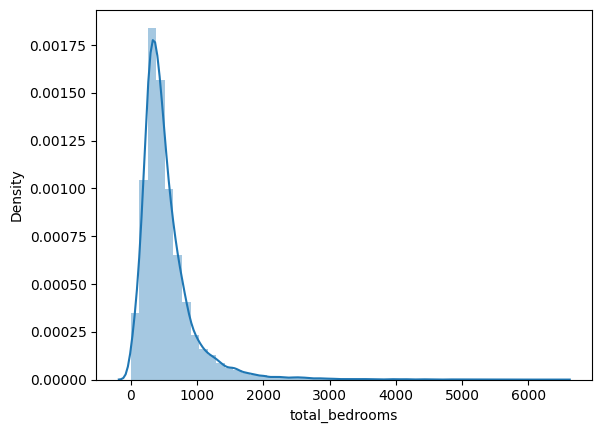

In [231]:
sns.distplot(df['total_bedrooms'])

<ipython-input-230-2ca15208a8d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_rooms'])


<Axes: xlabel='total_rooms', ylabel='Density'>

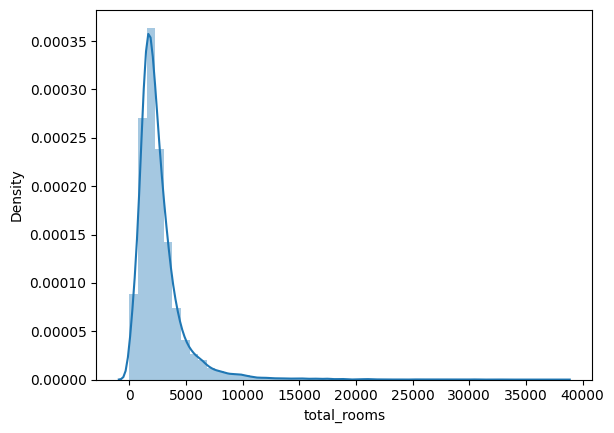

In [230]:
sns.distplot(df['total_rooms'])

<ipython-input-224-5e7001d2eb2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'])


<Axes: xlabel='median_house_value', ylabel='Density'>

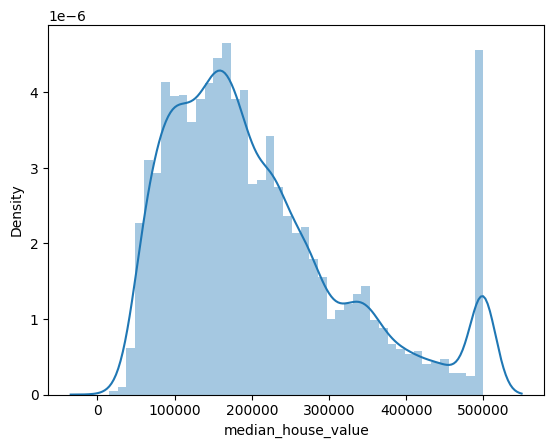

In [224]:
sns.distplot(df['median_house_value'])

<ipython-input-225-f8cb323942d8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['housing_median_age'])


<Axes: xlabel='housing_median_age', ylabel='Density'>

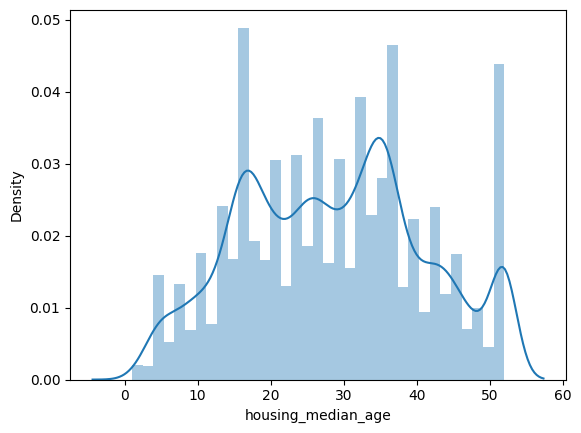

In [225]:
sns.distplot(df['housing_median_age'])

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

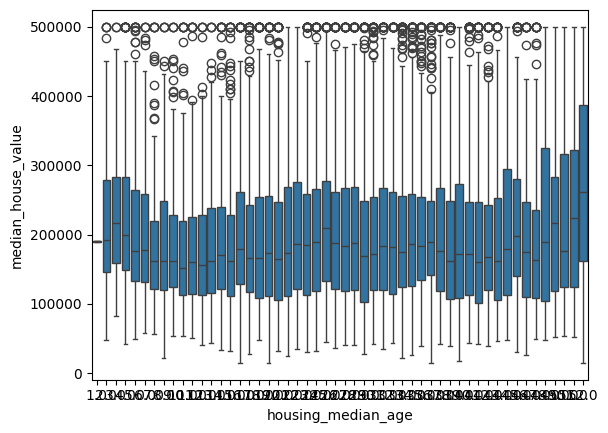

In [226]:
sns.boxplot(x='housing_median_age',y='median_house_value',data=df)

In [228]:
df[['housing_median_age', 'median_house_value']].corr()

,housing_median_age,median_house_value
housing_median_age,1.000000,0.106758
median_house_value,0.106758,1.000000


In [232]:
df[['total_rooms', 'median_house_value']].corr()

,total_rooms,median_house_value
total_rooms,1.000000,0.130991
median_house_value,0.130991,1.000000


In [233]:
df[['total_bedrooms', 'median_house_value']].corr()

,total_bedrooms,median_house_value
total_bedrooms,1.000000,0.045783
median_house_value,0.045783,1.000000
